<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Kim/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns

In [55]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [56]:
data = pd.read_csv("coin_Bitcoin.csv")

In [57]:
#understanding the data

data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [58]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


In [59]:
data.describe() 

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


In [60]:
data.shape #to check the shape of the data for bitcoin 

(2862, 10)

In [61]:
data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [62]:
data.nunique() #displays the unique values 

SNo          2862
Name            1
Symbol          1
Date         2862
High         2852
Low          2856
Open         2855
Close        2849
Volume       2621
Marketcap    2861
dtype: int64

In [63]:
data['Marketcap'].unique()  #looking for specific unique value

array([1.60376886e+09, 1.54281312e+09, 1.29895459e+09, ...,
       8.77766126e+11, 8.63752275e+11, 8.60978135e+11])

In [64]:
#cleaning the data 

In [65]:
data.isnull().sum() #checking null values in the dataset 

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [66]:
crypto = 'BTC'
currency = 'USD'

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [67]:
data.index = pd.to_datetime(data.index)

In [68]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999
...,...,...,...,...,...,...
2021-06-24,35487.246094,31350.884766,34659.105469,31637.779297,4.023090e+10,31637.779297
2021-06-25,32637.587891,30184.501953,31594.664062,32186.277344,3.858539e+10,32186.277344
2021-06-26,34656.128906,32071.757812,32287.523438,34649.644531,3.551164e+10,34649.644531


In [69]:
#preparing the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [70]:
pred_days = 30 # number of days for the prediction

In [71]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [72]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [73]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
74/74 [==============================] - 7s 40ms/step - loss: 0.0067
Epoch 2/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0021
Epoch 3/30
74/74 [==============================] - 3s 39ms/step - loss: 0.0017
Epoch 4/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0016
Epoch 5/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0013
Epoch 6/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0014
Epoch 7/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0013
Epoch 8/30
74/74 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 9/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 10/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0013
Epoch 11/30
74/74 [==============================] - 3s 40ms/step - loss: 0.0010
Epoch 12/30
74/74 [==============================] - 3s 40ms/step - loss: 9.2457e-04
Epoch 13/30
74/74 [==============

In [74]:
test_start = dt.datetime(2021,6,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [75]:
test_data.index = pd.to_datetime(test_data.index)

In [76]:
test_data #displaying the current data until the exact date provided 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-31,37896.734375,35787.085938,37293.792969,36684.925781,34639423297,36684.925781
2021-06-01,38231.339844,35966.308594,36699.921875,37575.179688,33070867190,37575.179688
2021-06-02,39478.953125,37243.972656,37599.410156,39208.765625,35460750427,39208.765625
2021-06-03,39242.484375,35717.722656,39242.484375,36894.406250,41831090187,36894.406250
2021-06-04,37917.714844,34900.414062,36880.156250,35551.957031,35959473399,35551.957031
2021-06-05,36436.421875,35304.578125,35538.609375,35862.378906,28913440585,35862.378906
2021-06-06,36790.570312,33480.640625,35835.265625,33560.707031,33683936663,33560.707031
2021-06-07,34017.386719,31114.443359,33589.519531,33472.632812,49902050442,33472.632812
2021-06-08,37537.371094,32475.865234,33416.976562,37345.121094,53972919008,37345.121094


In [77]:
actual_prices = test_data['Close']

In [78]:
actual_prices = np.array(actual_prices)
actual_prices

array([36684.92578125, 37575.1796875 , 39208.765625  , 36894.40625   ,
       35551.95703125, 35862.37890625, 33560.70703125, 33472.6328125 ,
       37345.12109375, 36702.59765625, 37334.3984375 , 35552.515625  ,
       39097.859375  , 40218.4765625 , 40406.26953125, 38347.0625    ,
       38053.50390625, 35787.24609375, 35615.87109375, 35698.296875  ,
       31676.69335938, 32505.66015625, 33723.02734375, 34662.4375    ,
       31637.77929688, 32186.27734375, 34649.64453125, 34434.3359375 ,
       36170.4375    ])

In [79]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [80]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [81]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [82]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [83]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

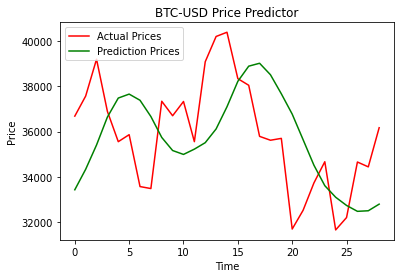

In [84]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()